<img src="ub_si.png" height="225" width="100%" />

# **N. W. Kusuma** || **`Big Data Final Exam`**

***
# **Libraries**
***
## Import common libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

## Setting compiler options
***

In [2]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
print(os.listdir("./datasets"))

import xlrd

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)

['UAS-PCA_MLR-b.ipynb', 'UAS-PCA_MLR.ipynb', 'UAS-RFM.ipynb', 'UAS-SVM.ipynb', 'UAS_PCA dan Multi Linear Regression.xlsx', 'UAS_RFM.xlsx', 'UAS_SVM.xlsx', 'ub_si.png']


***
# **Data Understanding**
***
## Get the data
- ### Load data files (`UAS_PCA dan Multi Linear Regression.xlsx`)
- ### And display the first five row subset.

In [7]:
dataset = pd.read_excel("./datasets/UAS_PCA dan Multi Linear Regression.xlsx")

dataset.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,18044724,3,30496813,22079895,856297,0,4537131469,1,1,1,0
1,1234561810,53,41844607,3,5459323,0,599572,17479146,2515048708,1,0,1,1
2,1234561778,52,34437700,2,34261341,0,2743516,0,2021012050,1,0,1,0
3,1234561915,40,45774220,4,27771816,18639840,4534694,18489681,617757979,1,1,1,1
4,1234561363,55,35452808,2,38657479,0,0,11176695,4157711017,1,0,0,1


## Explore the data
***
- ### Inspect data structures, data desciption summary, missing values, etc.
- ### Also, lets inspect the four `Unnamed` columns, one of them might be used as `target` feature. 

In [8]:
def inspect_data(df, note=None):
      try:
            pd.set_option("display.width", 150)
            print(f"{'*'*126}\n\tBCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.\n"
                  f"{'='*126}\n\t\tThe data contains of `{df.shape[0]}` entries and `{df.shape[1]}` columns.\n"      
                  f"{'-'*126}\n\t\tColumns:\t\tdtypes:\t\t# Unique:\t# NaN:")
            for i in range(len(df.columns)):
                  if len(df.columns.values[i]) >= 16: s = '\t'
                  elif len(df.columns.values[i]) >= 8: s = '\t\t'
                  else: s = '\t\t\t'
                  print(f"\t\t{df.columns.values[i]}{s}"
                        f"{np.dtype(df.iloc[:,i])}\t\t"
                        f"{df.iloc[:,i].nunique()}\t\t"
                        f"{df.iloc[:,i].isnull().sum()}") 
            print(f"{'='*126}\n{df.describe().T}")
      finally:
            if note != None: print(f"{'='*126}\nNote:\n{note}\n{'*'*126}")
            else: print('*'*126)
            pd.reset_option("display.width")

In [9]:
note = "The `Unnamed: 9` column seems to have a singular value and doesn't look like it meant anything at all.\nLets check the correlations between columns."
inspect_data(dataset, note)

******************************************************************************************************************************
	BCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.
		The data contains of `999` entries and `13` columns.
------------------------------------------------------------------------------------------------------------------------------
		Columns:		dtypes:		# Unique:	# NaN:
		Customer ID		int64		645		0
		Umur			int64		36		0
		Income			int64		999		0
		Product_holding		int64		4		0
		Saving			int64		999		0
		Deposit			int64		497		0
		KK			int64		503		0
		Tab Bisnis		int64		513		0
		Limit Kredit Mortgage	int64		999		0
		Unnamed: 9		int64		1		0
		Unnamed: 10		int64		2		0
		Unnamed: 11		int64		2		0
		Unnamed: 12		int64		2		0
                       count          mean           std           min           25%           50%           75%           max
Customer ID           999.00 1234561484.17        288.79 1234561000.00 1234561227.

Correlations matrix between features:


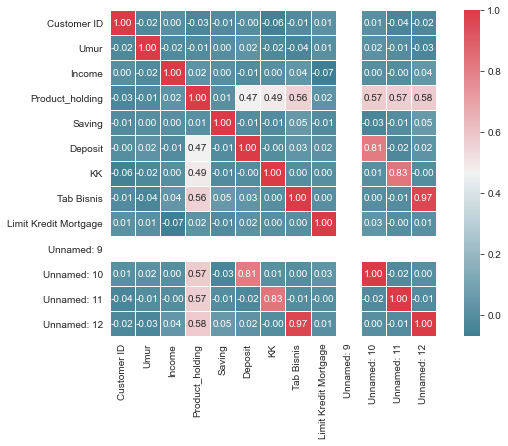

In [10]:
try: 
    pd.set_option("display.width", 250)
    #Generate correlation matrix
    corr = dataset.corr()
    #print(f"Correlations matrix between features:\n{corr}")
    print(f"Correlations matrix between features:")

    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax, annot=True, fmt='.2f', linewidths=0.5);
finally:
    pd.reset_option("display.width")

# **Data Preparation**
***
## Clean-up the data
- ### As expected the column `Unnamed: 9`, doesn't have linear correlation with other columns even with it self.
- ### The `Unnamed: 10` column have high positive linearity in relation to `Deposit` column.
- ### Likewise, the `Unnamed: 11` column also have high positive linearity in relation to `KK` column.
- ### And the `Unnamed: 12` column definitely have high linear corresponds with the `Tab Bisnis` column. 
- ### Any of these three columns must be an indication of the approval for credit limit given with consideration to whether the customer have those features or not.
- ### Following these patern, the `Unnamed: 9` column must be supposed to related with the customer having a `Saving`, however, we will just drop it.
- ### We will take `Unnamed: 12` column as our `target` feature as its has slightly higher `mean` value, so we will also drop the other two.


In [13]:
# Drop `Unnamed: 9` column
dataset.drop(dataset.iloc[:,-4:-1], axis=1, inplace=True)

## Rename the column
***
- ### Rename the `Unnamed: 12` columns to `Approved`.
- ### Replace the `whitespace` in the column\`s names with `underscore`.

In [14]:
dataset.rename(columns={dataset.columns.values[-1]:'Approved'}, inplace=True)
dataset.columns = dataset.columns.str.replace(' ','_')

inspect_data(dataset)

******************************************************************************************************************************
	BCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.
		The data contains of `999` entries and `10` columns.
------------------------------------------------------------------------------------------------------------------------------
		Columns:		dtypes:		# Unique:	# NaN:
		Customer_ID		int64		645		0
		Umur			int64		36		0
		Income			int64		999		0
		Product_holding		int64		4		0
		Saving			int64		999		0
		Deposit			int64		497		0
		KK			int64		503		0
		Tab_Bisnis		int64		513		0
		Limit_Kredit_Mortgage	int64		999		0
		Approved		int64		2		0
                       count          mean           std           min           25%           50%           75%           max
Customer_ID           999.00 1234561484.17        288.79 1234561000.00 1234561227.50 1234561472.00 1234561734.50 1234562000.00
Umur                  999.00         3

# **Data Modeling**
***
## Assign `target` feature
- ### Choose the `Approved` column as the `target` feature.

In [64]:
# Determine target feature
y = dataset['Approved']
X = dataset.drop('Approved', axis=1)

print(f"{'-'*40}\n Dimension of the target: {y.shape}\n\tand the features: {X.shape}\n{'-'*40}")

----------------------------------------
 Dimension of the target: (999,)
	and the features: (999, 9)
----------------------------------------


## Splitting the data
***
- ### Dividing the dataset into `training` and `testing` sets.

In [79]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing set with 70% and 30% proportion respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"{'*'*45}\n  The dimension of y_train : {y_train.shape}\n\t     "
      f"  and X_train : {X_train.shape}\n{'-'*45}\n"
      f"  The dimension of y_test  : {y_test.shape}\n\t     "
      f"  and X_test  : {X_test.shape}\n{'*'*45}")

*********************************************
  The dimension of y_train : (699,)
	       and X_train : (699, 9)
---------------------------------------------
  The dimension of y_test  : (300,)
	       and X_test  : (300, 9)
*********************************************


## Scalling the data
***
- ### We first need to scale and standardize our dataset so we can apply `PCA` to it.
- ### I will use `StandarScaler` to do it.

In [80]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
sc = StandardScaler()

# Fit StandardSacaler to and transform X
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(f"{'*'*75}\nDimension of the training X: {X_train.shape}\n{'-'*75}\n\nFirst few subsets of it:\n{'-'*75}\n{X_train[5]}\n{'*'*75}")

***************************************************************************
Dimension of the training X: (699, 9)
---------------------------------------------------------------------------

First few subsets of it:
---------------------------------------------------------------------------
[ 1.15109542 -0.61697315  0.84328844  1.75253777 -0.78068931  0.6862176
  1.51903624  1.08825899  0.2578827 ]
***************************************************************************


## Applying `Principal Component Analysis`
***
- ### Fitting and transforming `X_train` and `X_test` with `PCA`.
- ### Visualize the individual and cummulative `explained variance ratio` of the `PCA`.
- ### The ratio of variance is the `eigenvalue` divided by `total eigenvalues`.

****************************************************************************************
First few subsets of the training X after PCA:
----------------------------------------------------------------------------------------
[[ 1.78942135 -0.9078282   1.13136152  1.09991124  0.42109267 -0.54965096
  -1.50225178 -0.19531839  0.76965954]
 [ 1.09369804 -1.27099762 -0.01330599  0.86925006 -1.85507722 -2.04783164
   0.69965479 -0.19809016 -0.39004799]]
----------------------------------------------------------------------------------------
PCA Variance Ratio:
----------------------------------------------------------------------------------------
[0.21224763 0.1239323  0.11957225 0.11271664 0.11263126 0.10475024
 0.1004583  0.09883667 0.01485471]
----------------------------------------------------------------------------------------
Cumulative Eigenvalues:
----------------------------------------------------------------------------------------
[0.21224763 0.33617993 0.45575218 0.56846882 0

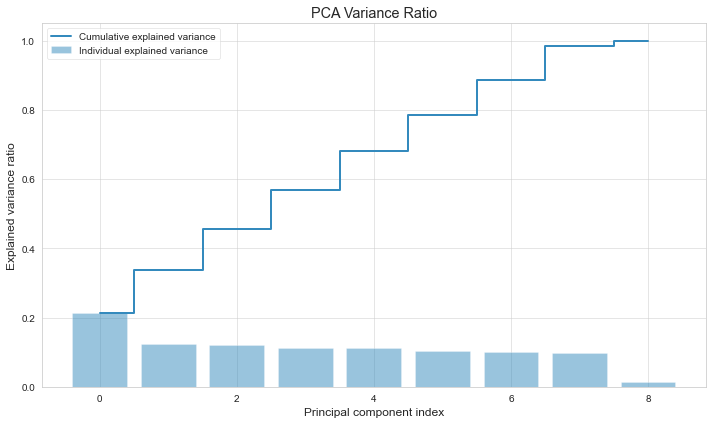

In [81]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print(f"{'*'*88}\nFirst few subsets of the training X after PCA:\n{'-'*88}\n{X_train[:2]}\n"
      f"{'-'*88}\nPCA Variance Ratio:\n{'-'*88}\n{exp_var_pca}\n"
      f"{'-'*88}\nCumulative Eigenvalues:\n{'-'*88}\n{cum_sum_eigenvalues}\n{'*'*88}")

# Create the visualization plot
plt.figure(figsize=(10,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title("PCA Variance Ratio")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Applying `Principal Component Analysis`
***
- ### Applying PCA with number of compononts set to 7.

***************************************************************************
First few subsets of the X_train after PCA:
---------------------------------------------------------------------------
[[ 1.78942135 -0.9078282   1.13136152  1.09991124  0.42109267 -0.54965096
  -1.50225178]
 [ 1.09369804 -1.27099762 -0.01330599  0.86925006 -1.85507722 -2.04783164
   0.69965479]
 [-1.33647016  0.16425008  0.49773235  0.75081196 -1.0803423  -1.06697798
   1.21922918]
 [-0.76406292  0.05184631 -0.91185002 -0.53033695 -0.69738857 -0.47199929
  -0.61362759]
 [ 2.40970838  0.56599643 -0.43625186  1.16759357  0.64945259 -0.10056983
  -0.58691279]
 [ 2.4522488  -0.39215785 -1.12270523 -0.41521132  1.03124381 -0.63894528
   0.72061086]]
---------------------------------------------------------------------------
PCA Variance Ratio:
---------------------------------------------------------------------------
[0.21224763 0.1239323  0.11957225 0.11271664 0.11263126 0.10475024
 0.1004583 ]
*****************

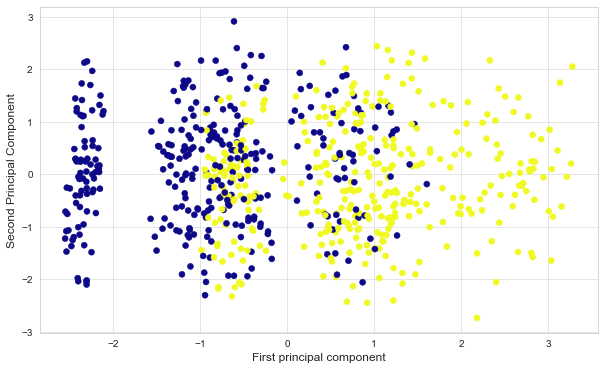

In [82]:
# Determining PCA compononts to 7
pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

exp_var_pca = pca.explained_variance_ratio_

print(f"{'*'*75}\nFirst few subsets of the X_train after PCA:\n{'-'*75}\n{X_train[:6]}\n"
      f"{'-'*75}\nPCA Variance Ratio:\n{'-'*75}\n{exp_var_pca}\n{'*'*75}")

plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component');

## Applying `Multi-linear Regression`
***
- ### Modeling `Multi-linear Regression` with training datasets.
- ### Evaluate model accuracy by applying it to testing dataset.

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mlr_fit = lr.fit(X_train, y_train)

accu = mlr_fit.score(X_test, y_test)
intc = mlr_fit.intercept_
coef = mlr_fit.coef_

print(f"Accuracy   : {accu:.2f}\nIntercept  : {intc:.2f}\nCoefficient:")
coef

Accuracy   : 0.94
Intercept  : 0.52
Coefficient:


array([ 0.22662445, -0.05716748, -0.1314952 , -0.08525949, -0.13805478,
       -0.15843231, -0.26089855])

# **Deployment**
***
## Making prediction
- ### Predict the target feature.

In [96]:
# Making predictions using the model
y_pred = mlr_fit.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Prediction results:")
df_pred.T

Prediction results:


,722,77,877,613,903,531,399,452,31,356,...,959,862,167,558,986,695,10,105,68,535
Actual,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00
Predicted,1.02,-0.03,0.07,0.04,-0.05,0.99,1.17,0.03,0.93,1.13,...,0.90,-0.08,-0.04,-0.05,0.97,-0.04,0.93,0.97,1.21,1.07


## Calculating error terms
***
- ### Calculating error terms on prediction results.
- ### Regarding the `Adjusted R2` score, it's calculated as follow:
- ### `Adjusted R2 = 1 – [(1-RSquared)*(n-1)/(n-k-1)]`
- ### `n`: The number of observations, 
- ### `k`: The number of predictor variables

In [97]:
# Calculating error terms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = 1 - ((1 - r_squared)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


In [104]:
print(f"{'*'*48}\n"+
      f"{' '*12}Mean Absolute Error : {mae:.5f}\n"+  
      f"{' '*13}Mean Squared Error : {mse:.5f}\n"+  
      f"{' '*8}Root Mean Squared Error : {rmse:.5f}\n"+
      f"{'-'*48}\n"+
      f"{' '*16}R-Squared Score : {r_squared:.5f}\n"+
      f"{' '*7}Adjusted R-Squared Score : {adj_r_squared:.5f}\n"+
      f"{'*'*48}")

************************************************
            Mean Absolute Error : 0.09717
             Mean Squared Error : 0.01545
        Root Mean Squared Error : 0.12430
------------------------------------------------
                R-Squared Score : 0.93820
       Adjusted R-Squared Score : 0.93672
************************************************
